# **Módulos**

In [19]:
!pip install gravis

In [20]:
import networkx as nx
import matplotlib.pyplot as plt
import gravis

# **1. Modularidad**



## **1.1 Función para calcular la modularidad de una red**

In [21]:
def calcular_modularidad(G, particion):
    m = G.number_of_edges() # Nº de enlaces
    nodos = list(G.nodes())
    sumatorio = 0
    matriz_adyacencia = nx.adjacency_matrix(G).todense()

    for nodoi in nodos:
      for nodoj in nodos:
        # numero de enlaces entre i y j
        A = matriz_adyacencia[nodoi-1, nodoj-1]

        # Grado de los nodos i y j
        ki = G.degree(nodoi)
        kj = G.degree(nodoj)

        # Si pertenecen a la misma comunidad 1, en caso contrario 0.
        if particion[nodoi] == particion[nodoj]:
          sumatorio += A - ((ki * kj) / (2 * m)) # suma si pertenece a la communidad

    return sumatorio / (2 * m)

## **1.2  Valor de la modularidad para los siguientes ejemplos:**

### **Ejemplo de wikipedia**
https://en.wikipedia.org/wiki/Modularity_(networks)#/media/File:Partitioned_network.jpg

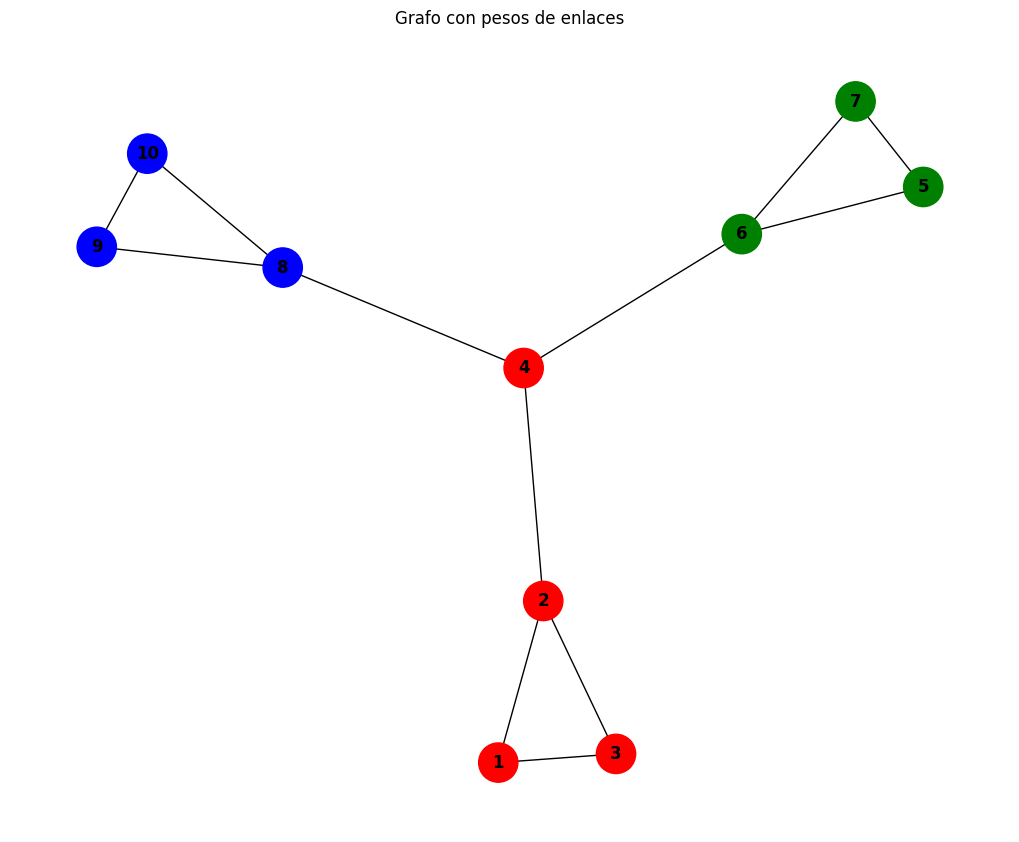

In [22]:
# Crear el grafo
G = nx.Graph()
G.add_edges_from([(1,2), (1,3), (2,3), (2,4), (4,6), (5,6), (5,7), (6,7), (4,8), (8,9), (8,10), (9,10)])

# Asignar colores a los nodos
node_colors = ['red' if node in [1, 2, 3, 4] else 'green' if node in [5, 6, 7] else 'blue' for node in G.nodes()]

# Mostrar el grafo
plt.figure(figsize=(10, 8))  # Ajustar el tamaño del gráfico
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=node_colors, font_weight='bold', node_size=800)  # Ajustar el tamaño de los nodos
plt.title('Grafo con pesos de enlaces')
plt.show()


In [23]:
# Definir la partición de los nodos según el ejemplo de Wikipedia
particion_wikipedia = {1:'c1', 2:'c1', 3:'c1', 4:'c1',
                       5:'c2', 6:'c2', 7:'c2',
                       8:'c3',9:'c3',10:'c3'}

# Calcular la modularidad usando la función que hemos implementado
modularidad_wikipedia = calcular_modularidad(G, particion_wikipedia)

In [24]:
print(f'Modularidad del grafo de wikipedia : {modularidad_wikipedia}')

Modularidad del grafo de wikipedia : 0.4895833333333333


### **Ejemplo de clase**

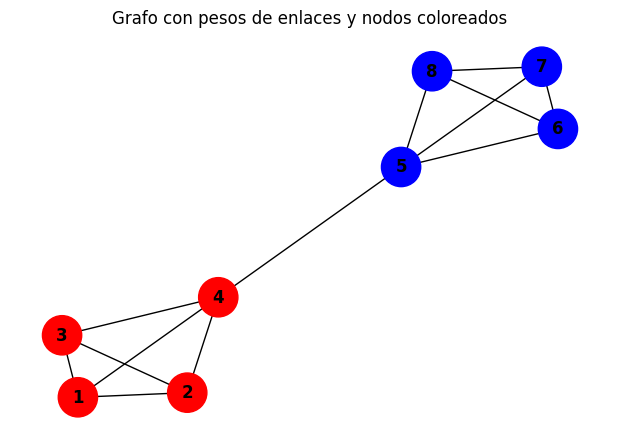

In [25]:
# Crear el grafo
G = nx.Graph()
G.add_edges_from([(1,2), (1,3), (1,4), (2,3), (2,4), (3,4), (4,5), (5,6), (5,7), (5,8), (6,7), (6,8), (7,8)])

# Definir colores para los nodos
color_map = {1: 'red', 2: 'red', 3: 'red', 4: 'red', 5: 'blue', 6: 'blue', 7: 'blue', 8: 'blue'}

# Mostrar el grafo
plt.figure(figsize=(6, 4))  # Ajustar el tamaño del gráfico
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=[color_map[node] for node in G.nodes()], font_weight='bold', node_size=800)  # Ajustar el tamaño de los nodos
plt.title('Grafo con pesos de enlaces y nodos coloreados')
plt.show()

#### **a. Para una partición correspondiente a toda la red (modularidad = 0)**

In [26]:
particion = {1: 'c1', 2: 'c1', 3: 'c1', 4: 'c1', 5: 'c1', 6: 'c1', 7: 'c1', 8: 'c1'}

modularidad = calcular_modularidad(G, particion)

print(f'modularidad para toda la red: {modularidad:.4f}')

modularidad para toda la red: -0.0000


#### **b. Para una partición correspondiente a cada nodo (modularidad = -0.1272)**

In [27]:
particion = {1: 'c1', 2: 'c2', 3: 'c3', 4: 'c4', 5: 'c5', 6: 'c6', 7: 'c7', 8: 'c8'}

modularidad = calcular_modularidad(G, particion)

print(f'modularidad para una particion correspondiente a cada nodo: {modularidad:.4f}')

modularidad para una particion correspondiente a cada nodo: -0.1272


#### **c. Para la partición de colores (modularidad = 0.4231)**

In [28]:
particion = {1: 'c1', 2: 'c1', 3: 'c1', 4: 'c1', 5: 'c2', 6: 'c2', 7: 'c2', 8: 'c2'}

modularidad = calcular_modularidad(G, particion)

print(f'modularidad para la particion de colores: {modularidad:.4f}')

modularidad para la particion de colores: 0.4231


#**2. Detección de comunidades basada en la eliminación de enlaces**

## **2.1. Algoritmo de Girvan-Newman**

In [29]:
def girvan_newman(G):
    G_copy = G.copy()
    mejor_particion = None
    mejor_modularidad = -1
    dict_particiones = {}

    while G_copy.number_of_edges() > 0:
      # Calculamos la centralidad de intermediación
      edge_betweenness = nx.edge_betweenness_centrality(G_copy)

      # Tomamos el enlace con max centralidad de intermediacion
      edge_max = max(edge_betweenness, key=edge_betweenness.get)

      # Eliminamos el enlace max
      G_copy.remove_edge(edge_max[0], edge_max[1])

      # Calculamos y Comprobamos si se ha separado el grafo en particiones
      particiones = list(nx.connected_components(G_copy))

      if len(particiones) > 1:
        #particiones = asignar_comunidad(particiones)
        #modularidad = calcular_modularidad(G, particiones)
        modularidad = nx.algorithms.community.modularity(G, particiones)  # Calculamos la modularidad de las particiones
        
        if modularidad > mejor_modularidad: # Nos quedamos con la que tenga el mayor valor de modularidad
          mejor_particion = particiones
          mejor_modularidad = modularidad

        if particiones not in dict_particiones.values(): # Almacenamos todas las particiones con su modularidad
          dict_particiones[modularidad] = particiones

    return dict_particiones, mejor_particion


def asignar_comunidad(particiones):
  dict_particiones = {}
  c = 1
  for particion in particiones:
    for nodo in particion:
      dict_particiones[nodo] = 'c'+str(c)
    c += 1

  return dict_particiones

## **2.2 Comprobacion del algoritmo con red “Zachary’s karate club”**

In [30]:
def dibujar_grafo_con_comunidades(G, particiones):
    # Crear un diccionario de color para asignar un color único a cada comunidad
    color_map = {}
    for i, comunidad in enumerate(particiones):
        for nodo in comunidad:
            color_map[nodo] = i

    # Dibujar el grafo con diferentes colores para cada comunidad
    pos = nx.fruchterman_reingold_layout(G)  # Posiciones de los nodos
    nx.draw(G, pos, node_color=[color_map[nodo] for nodo in G.nodes()], with_labels=True, cmap=plt.cm.tab20)
    plt.show()

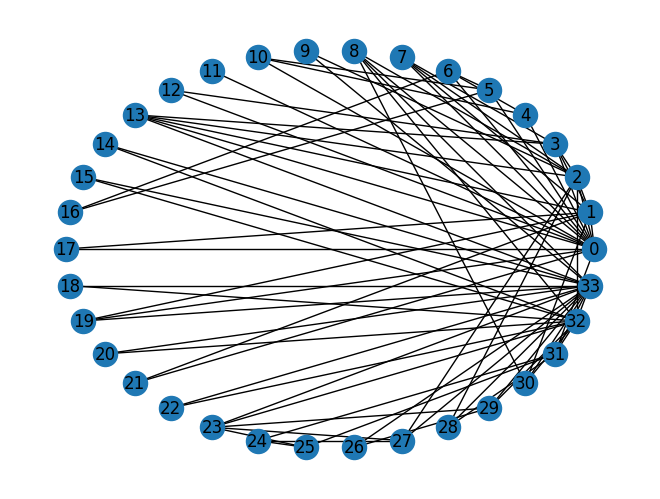

In [31]:
G_karate = nx.karate_club_graph()
nx.draw_circular(G_karate, with_labels=True)

In [32]:
# Usamos el alg de Girvan-Newman
particiones, mejor_particion = girvan_newman(G_karate)

In [33]:
mejor_particion = [list(particion) for particion in mejor_particion]

print("\t-- Comunidades de la mejor particion --")
print('--------------------------------------------------------------------')
for i,p in enumerate(mejor_particion):
  print(f'{i+1}º Comunidad -> {p}')

print("""
      	-- Comunidades de la mejor particion --
--------------------------------------------------------------------
1º Comunidad -> [0, 1, 3, 7, 11, 12, 13, 17, 19, 21]
2º Comunidad -> [2, 24, 25, 27, 28, 31]
3º Comunidad -> [4, 5, 6, 10, 16]
4º Comunidad -> [32, 33, 8, 14, 15, 18, 20, 22, 23, 26, 29, 30]
5º Comunidad -> [9]
      """)

	-- Comunidades de la mejor particion --
--------------------------------------------------------------------
1º Comunidad -> [0, 1, 3, 7, 11, 12, 13, 17, 19, 21]
2º Comunidad -> [2, 24, 25, 27, 28, 31]
3º Comunidad -> [4, 5, 6, 10, 16]
4º Comunidad -> [32, 33, 8, 14, 15, 18, 20, 22, 23, 26, 29, 30]
5º Comunidad -> [9]


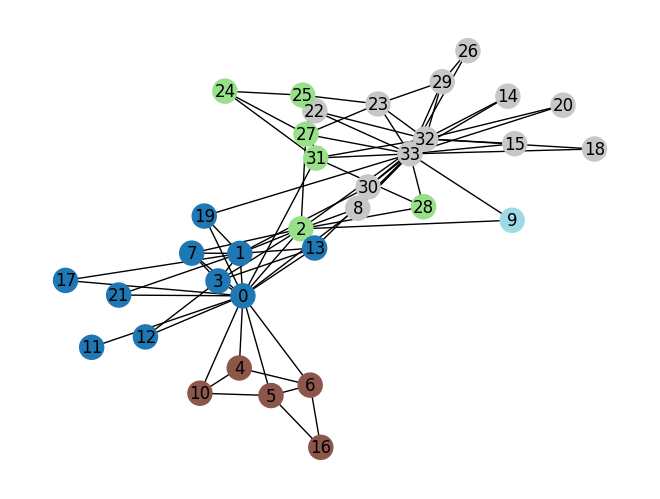

In [34]:
dibujar_grafo_con_comunidades(G_karate, mejor_particion)

In [35]:
Nparticiones_modularidad = {} # dict con clave el numero de particones y valor la modularidad
print (type(particiones))
for k,v in particiones.items():
  print(f'{len(v)} particiones -> modularidad: {k:.4f}')
  Nparticiones_modularidad[len(v)] = k

2 particiones -> modularidad: 0.3477
3 particiones -> modularidad: 0.3423
4 particiones -> modularidad: 0.3581
5 particiones -> modularidad: 0.3850
6 particiones -> modularidad: 0.3758
7 particiones -> modularidad: 0.3595
8 particiones -> modularidad: 0.3471
9 particiones -> modularidad: 0.3332
10 particiones -> modularidad: 0.3134
11 particiones -> modularidad: 0.3123
12 particiones -> modularidad: 0.3037
13 particiones -> modularidad: 0.2943
14 particiones -> modularidad: 0.2827
15 particiones -> modularidad: 0.2712
16 particiones -> modularidad: 0.2545
17 particiones -> modularidad: 0.2398
18 particiones -> modularidad: 0.2269
19 particiones -> modularidad: 0.2230
20 particiones -> modularidad: 0.2006
21 particiones -> modularidad: 0.1870
22 particiones -> modularidad: 0.1609
23 particiones -> modularidad: 0.1428
24 particiones -> modularidad: 0.1177
25 particiones -> modularidad: 0.1109
26 particiones -> modularidad: 0.1008
27 particiones -> modularidad: 0.0884
28 particiones -> mo

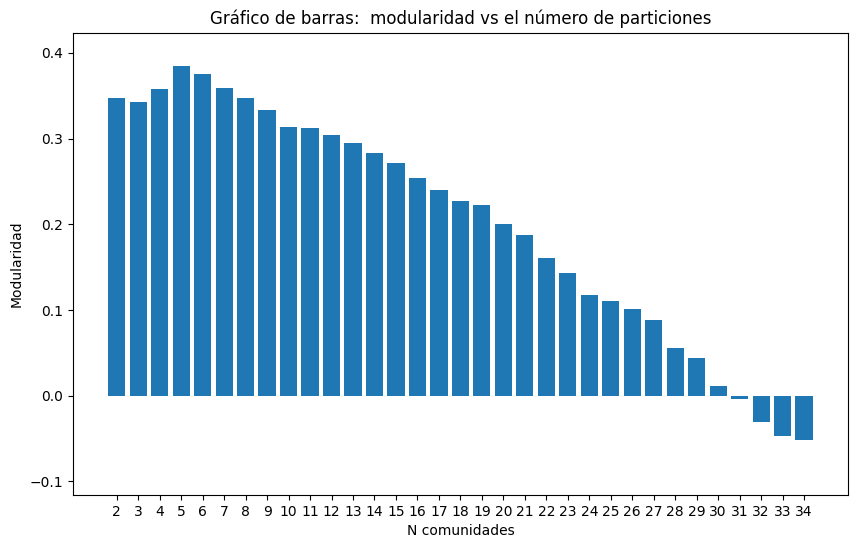

In [36]:
# Extraer claves y valores del diccionario
x_values = list(Nparticiones_modularidad.keys())
y_values = list(Nparticiones_modularidad.values())

 # Ajustar el tamaño de la figura
plt.figure(figsize=(10, 6))  # Cambia el ancho y el alto según tus necesidades

# Crear el gráfico de barras
plt.bar(x_values, y_values, width=0.8)

# Añadir etiquetas y título
plt.xlabel('N comunidades')
plt.ylabel('Modularidad')
plt.title('Gráfico de barras:  modularidad vs el número de particiones')

# Ajustar límites del eje y para incluir valores positivos y negativos
max_abs_y = max(abs(max(y_values)), abs(min(y_values)))
plt.ylim(-max_abs_y * 0.3, max_abs_y * 1.1)  # Ajusta el factor 1.1 según tus necesidades

# Mostrar los valores de x debajo de la línea del eje x
plt.xticks(x_values)

# Mostrar el gráfico
plt.show()